# ĐỒ ÁN THỰC HÀNH
# CSC17104 – LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

Giảng viên: Bùi Tiến Lên

Thông tin thành viên:
1. Nguyễn Văn Tuấn Đạt 19120472
2. Phan Xuân Hoài 20120481
3. Luân Mã Khương 20120515
4. 

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme()

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

## A. Thu thập dữ liệu
- Tên dữ liệu: HR Analytics: Job Change of Data Scientists
- Nguồn lấy dữ liệu: kaggle
- Link dữ liệu: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
- License: CC0: Public Domain
- Mô tả về dữ liệu: dữ liệu gồm tập train và tập test. Trong đồ án này, nhóm sẽ sử dụng tập train.
            + Dữ liệu gồm 14 cột và 19158 dòng.

In [2]:
df = pd.read_csv('aug_train.csv', encoding='utf-8')
df.shape

(19158, 14)

In [3]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0


## B. Khám phá dữ liệu (thường đan xen với pha tiền xử lý dữ liệu)

### 1.Mỗi dòng có ý nghĩa gì? Có vấn đề với các dòng có ý nghĩa khác nhau không?

* Mỗi dòng là thông tin của từng ứng viên, trong đó mỗi ô của dòng là dữ liệu tương ứng với cột của ô đó
* Không có vấn đề các dòng có ý nghĩa khác nhau

### 1.1 Kiểm tra các dòng có bị trùng lặp hay không?

In [4]:
have_duplicated_rows = np.any(df.duplicated())
have_duplicated_rows

False

Các dòng không bị trùng lặp.

### 2.Mỗi cột có ý nghĩa gì?
            
            - enrollee_id : ID với từng ứng viên

            - city: Mã thành phố

            - city_ development _index : Chỉ số phát triển của thành phố (theo tỷ lệ)

            - gender: Giới tính

            - relevent_experience: Kinh nghiệm liên quan của ứng viên

            - enrolled_university: Loại khóa học đại học đã đăng ký nếu có

            - education_level: Trình độ học vấn

            - major_discipline: Ngành học chính

            - experience: Kinh nghiệm (tính theo năm)

            - company_size: Số lượng nhân viên trong công ty của người sử dụng lao động hiện tại

            - company_type : Loại chủ lao động hiện tại

            - last_new_job: Sự khác biệt về số năm giữa công việc trước đây và công việc hiện tại

            - training_hours: Thời gian hoàn thành huấn luyện

            - target: 0 – Không nhảy việc, 1 – Nhảy việc

### 3.Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [5]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [6]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

Vì trong feature experience có các dữ liệu như <1, 1, 2, ..., 20, >20 nên ta sẽ chuyển dữ liệu sang dạng các khoảng như (0,1),
(1,5), (6,10), (11,15), (16,20), (21,30)

In [7]:
def trans_experience(experience):
    if isinstance(experience, float):
        return np.nan
    if experience == '<1':
        return (0,1)
    if experience == '>20':
        return (21,30)
    cei = math.ceil(int(experience)/5)
    return (cei*5 - 4, cei*5)

df['experience'] = df['experience'].apply(trans_experience)
df['experience']

0        (21, 30)
1        (11, 15)
2          (1, 5)
3          (0, 1)
4        (21, 30)
           ...   
19153    (11, 15)
19154    (11, 15)
19155    (21, 30)
19156      (0, 1)
19157      (1, 5)
Name: experience, Length: 19158, dtype: object

### 4.Với mỗi cột, các giá trị được phân bố như thế nào?

#### 4.1 Với các cột có giá trị dạng số

**Các cột dạng số:** _'enrollee_id', 'city_development_index', 'training_hours', 'target'_ 

DataFrame `summary_df` bên dưới chứa thông tin phân bố giá trị của các cột trên:
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng có ý nghĩa là: 
 + `"missing_ratio"`: tỉ lệ phần trăm các giá trị thiếu
 + `"count"`: số lượng giá trị 
 + `"mean"`: giá trị trung bình
 + `"std"`: độ lệch chuẩn
 + `"min"`: giá trị nhỏ nhất
 + `"25%"`: giá trị phân vị 25%
 + `"50%"`: giá trị phân vị 50%
 + `"75%"`: giá trị phân vị 75%
 + `"max"`: giá trị lớn nhất

In [8]:
summary_df = df.describe().round(1)
missing_ratio = pd.DataFrame(df[['enrollee_id', 'city_development_index', 'training_hours', 'target']].isna().sum() * 100/ len(df)).T.round(1)
missing_ratio = missing_ratio.set_axis(['missing_ratio'])
summary_df = pd.concat([missing_ratio, summary_df])
summary_df

,enrollee_id,city_development_index,training_hours,target
missing_ratio,0.0,0.0,0.0,0.0
count,19158.0,19158.0,19158.0,19158.0
mean,16875.4,0.8,65.4,0.2
std,9616.3,0.1,60.1,0.4
min,1.0,0.4,1.0,0.0
25%,8554.2,0.7,23.0,0.0
50%,16982.5,0.9,47.0,0.0
75%,25169.8,0.9,88.0,0.0
max,33380.0,0.9,336.0,1.0


Theo quan sát ở trên, ta thấy các cột có giá trị số không có giá trị thiếu. Mọi thứ trong có vẻ ổn.

### 4.2 Với các cột có giá trị categorical

Các giá trị sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu)
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu)

In [9]:
def missing_ratio(x):
    return (x.isna().mean()*100)
def num_values(x):
    return len(x.dropna().value_counts())
def value_ratios(x):
    count_value =  x.dropna().value_counts().sort_values(ascending=False)
    return (count_value/count_value.sum()*100).round(1).to_dict()
cat_df_info = df.select_dtypes(include="object").agg(func=[missing_ratio, num_values, value_ratios])
cat_df_info

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
missing_ratio,0.0,23.53064,0.0,2.014824,2.401086,14.683161,0.339284,30.994885,32.049274,2.207955
num_values,123,3,2,3,5,6,6,8,6,6
value_ratios,"{'city_103': 22.7, 'city_21': 14.1, 'city_16':...","{'Male': 90.2, 'Female': 8.5, 'Other': 1.3}","{'Has relevent experience': 72.0, 'No relevent...","{'no_enrollment': 73.6, 'Full time course': 20...","{'Graduate': 62.0, 'Masters': 23.3, 'High Scho...","{'STEM': 88.7, 'Humanities': 4.1, 'Other': 2.3...","{(1, 5): 30.7, (6, 10): 26.2, (21, 30): 17.2, ...","{'50-99': 23.3, '100-500': 19.4, '10000+': 15....","{'Pvt Ltd': 75.4, 'Funded Startup': 7.7, 'Publ...","{'1': 42.9, '>4': 17.6, '2': 15.5, 'never': 13..."


Các cột gender, company_size, company_type đều có số lượng giá trị thiếu khá lớn, trên 22%. Các số liệu khác trong có vẻ ổn

### 5. Tiền xử lí dữ liệu

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

Số lượng giá trị bị thiếu.

In [11]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Ta thấy có khá nhiều giá trị bị thiếu và đa số đều là categorical. Vì vậy, ta sẽ xóa các dòng bị thiếu.

In [12]:
mask = df['last_new_job'] == 'never'
df.loc[mask,["company_size","company_type"]] = "None"
df.dropna(inplace=True)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,"(11, 15)",50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,"(21, 30)",50-99,Funded Startup,4,8,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,"(11, 15)",<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,"(6, 10)",50-99,Pvt Ltd,1,46,1
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,"(1, 5)",5000-9999,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,"(1, 5)",100-500,Pvt Ltd,1,52,1
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,"(6, 10)",50-99,Pvt Ltd,1,36,1
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,"(6, 10)",100-500,Public Sector,3,23,0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,"(6, 10)",Oct-49,Funded Startup,1,25,0


Số lượng dòng bị thiếu khá nhiều, khoảng 1/2 của dữ liệu.

## C. Đưa ra các câu hỏi có ý nghĩa cần trả lời

### 1. Tỉ lệ Data Scientists trên 5 năm kinh nghiệm đang tìm kiếm công việc mới trong Top 5 thành phố phát triển nhất?

Lợi ích khi trả lời được câu hỏi:
- Với vai trò là doanh nghiệp sẽ biết thêm thông tin để thay đổi chính sách đãi ngộ hay điều chỉnh môi trường làm việc để giữ chân các nhân viên tài năng của minh.
- Liệu các Data Scientists nhiều năm kinh nghiệm có nhu cầu tìm kiếm thách thức mới cho bản thân mình.
- Thị trường việc làm về Data Scientist ở trong Top 5 thành phố phát triển nhất.

### 2. Số năm kinh nghiệm và kinh nghiệm có liên quan đến DS ảnh hưởng thế nào đến quyết định có nhảy việc không của người tham gia đào tạo?

**Lợi ích khi trả lời được câu hỏi:** Khi trả lời được câu hỏi công ty có thể đánh giá được đâu là một ứng viên tiềm năng muốn làm việc cho công ty dựa vào số năm kinh nghiệm và kinh nghiệm có liên quan đến DS của ứng viên để 

### 3. Có sự chênh lệch trình độ học vấn giữa nam và nữ hay không? Điều này có ảnh hưởng tới chỉ số phát triển của thành phố nơi mà họ làm việc?

**Lợi ích khi trả lời được câu hỏi:** Khi trả lời được câu hỏi có thể thống kê được sự phân bố của các ứng viên tới các thành phố có chỉ số phát triển cao hay thấp liên quan tới trình độ học vấn của các ứng viên phân nhóm theo giới tính

## D. Tiền xử lý và phân tích dữ liệu để trả lời cho từng câu hỏi

<h3 style='color:red; font-size:25px'> 1. Tỉ lệ Data Scientists trên 5 năm kinh nghiệm đang tìm kiếm công việc mới trong Top 5 thành phố phát triển nhất? </h3>

<h3 style='color:#6ac61f'> Bước 1: Tìm Top 5 thành phố phát triển nhất dựa trên "city_development_index" và gán vào biến top_5_city</h3>

Sort giảm dần theo "city_development_index"

In [13]:
sorted_city = df.sort_values("city_development_index", ascending=False).drop_duplicates(subset=["city"])

Lấy ra tên top 5 thành phố phát triển nhất và gán vào top_5_city

In [14]:
top_5_city = sorted_city.head().city

Trực quan hóa top 5 most developed cities

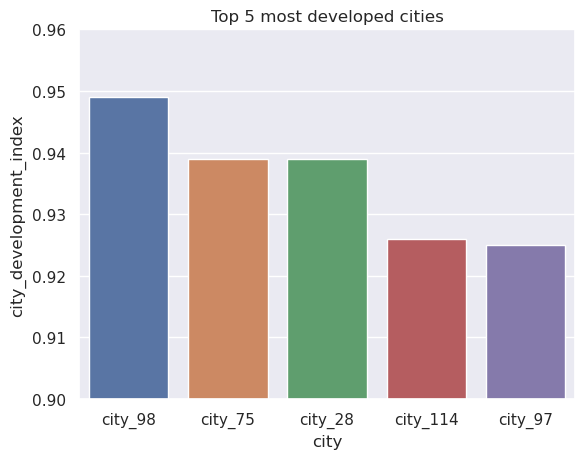

In [15]:
sns.barplot(data=sorted_city.head(5), x='city', y='city_development_index')
plt.ylim(0.9, 0.96)
plt.title("Top 5 most developed cities");

<h3 style='color:#6ac61f'> Bước 2: Tìm các Data Scientists trên 5 năm kinh nghiệm trong Top 5 thành phố phát triển nhất và gán vào biến DS_developed_city</h3>

In [16]:
DS_developed_city = df[(df["city"].isin(top_5_city)) & (df['experience']>(5,))]

<h3 style='color:#6ac61f'> Bước 3: Tính tỉ lệ các Data Scientists ở trên tìm kiếm công việc mới</h3>

Tính số lượng Data Scientists tìm kiếm công việc mới và tiếp tục làm công việc hiện tại

In [17]:
ds_target = DS_developed_city.groupby("target").size()

Tính tỉ lệ phần trăm các Data Scientists ở trên tìm kiếm công việc mới

In [18]:
percentage_ds_target = ds_target / len(DS_developed_city) * 100
percentage_ds_target = percentage_ds_target.rename({0: "Không nhảy việc", 1:"Nhảy việc"})

<h3 style='color:#6ac61f'> Trực quan hóa</h3>

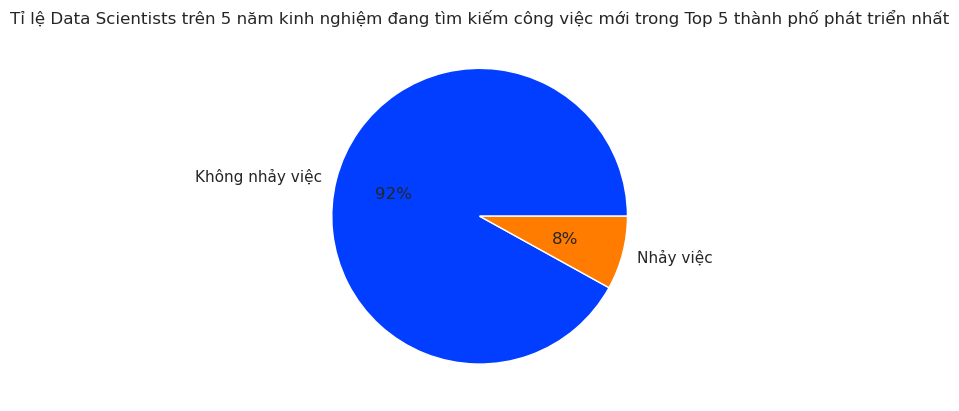

In [19]:
palette_color = sns.color_palette('bright')
labels = percentage_ds_target.index
plt.pie(percentage_ds_target,labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("Tỉ lệ Data Scientists trên 5 năm kinh nghiệm đang tìm kiếm công việc mới trong Top 5 thành phố phát triển nhất");

<h3 style='color:#6ac61f; line-height: 1.5;'>🤔🤔🤔 Từ biểu đồ trên ở tỉ lệ các Data Scientists trên 5 năm kinh nghiệm ở các thành phố phát triển đang tìm kiếm công việc mới rất thấp.
</h3>

<h3 style='color:red; font-size:25px'> 2 Số năm kinh nghiệm và kinh nghiệm có liên quan đến DS ảnh hưởng thế nào đến quyết định có nhảy việc không của người tham gia đào tạo? </h3>

<h3 style='color:red; font-size:25px'> 2.1 Tương quan giữa số năm kinh nghiệm và quyết định nhảy việc </h3>

<h3 style='color:#6ac61f'> Bước 1: Tính phần trăm người quyết định nhảy việc so với tổng số người trong cùng khoảng số năm kinh nghiệm </h3>

+ 1. Tính số lượng người trong mỗi khoảng năm kinh nghiệm vào series `experience_total`
+ 2. Tính số lượng người có quyết định nhảy việc vào series `experience_change`
+ 3. Tính phần trăm số lượng người quyết định nhảy việc so với tổng số người trong cùng một khoảng số năm kinh nghiệm vào series `experience_change_percent`

In [20]:
#Tính số lượng người trong mỗi khoảng năm kinh nghiệm
experience_total = df.groupby('experience')['experience'].size()

#Tính số lượng người có quyết định nhảy việc
mask = df['target'] == 1 
experience_change = df[mask].groupby('experience')['experience'].size()

#Tính phần trăm 
experience_change_percent = experience_change/experience_total

experience_change_percent

experience
(0, 1)      0.496063
(1, 5)      0.296614
(6, 10)     0.209347
(11, 15)    0.136962
(16, 20)    0.101147
(21, 30)    0.077888
Name: experience, dtype: float64

<h3 style='color:#6ac61f'> Bước 2: Trực quan </h3>

Ta sẽ trực quan mối tương quan giữa số năm kinh nghiệm và quyết định nhảy việc bằng đồ thị dạng cột, với:
+ Trục hoành thể hiện số năm kinh nghiệm
+ Trục tung thể hiện phần trăm số người quyết định nhảy việc so với tổng số người trong cùng một khoảng số năm kinh nghiệm

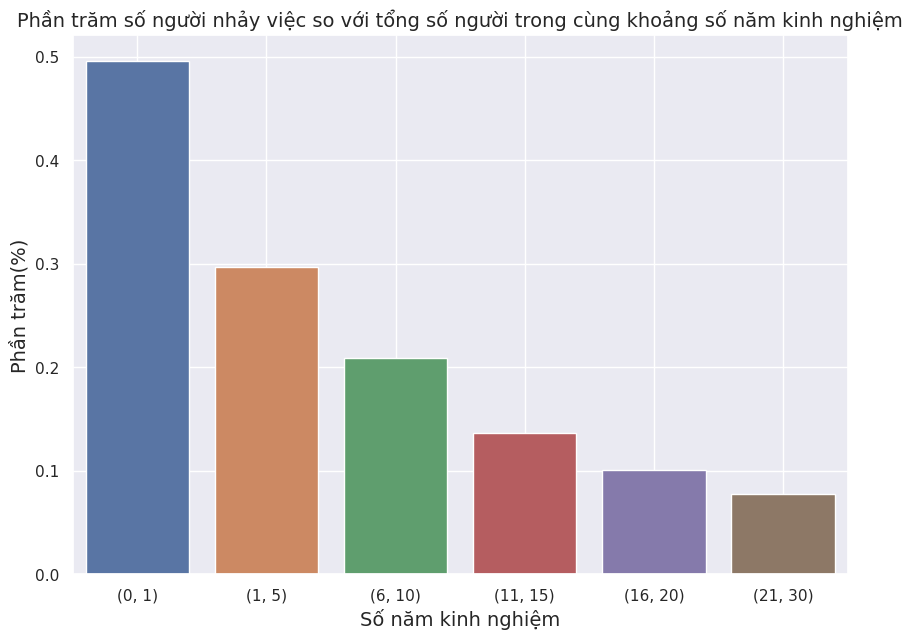

In [21]:
plt.figure(figsize=(10,7))

sns.barplot(x = experience_change_percent.index, y = experience_change_percent.values)

plt.title('Phần trăm số người nhảy việc so với tổng số người trong cùng khoảng số năm kinh nghiệm', fontsize=14)
plt.xlabel('Số năm kinh nghiệm', fontsize=14)
plt.ylabel('Phần trăm(%)', fontsize=14)
plt.grid(True)

plt.show()

<h3 style='color:#6ac61f; line-height: 1.5;'>🤔🤔🤔 Từ biểu đồ trên ta có thể thấy một ứng viên có số năm kinh nghiệm càng cao thì khả năng ứng viên đó nhảy việc càng thấp. Điều này có thể dự đoán là bởi khi một người có số năm kinh nghiệm và tuổi càng tăng lên họ sẽ muốn một công việc ổn định bởi cơ hội và khả năng thăng tiến cũng giảm dần.
</h3>

---

<h3 style='color:red; font-size:25px'> 2.2 Tương quan giữa kinh nghiệm liên quan đến DS và quyết định nhảy việc </h3>

<h3 style='color:#6ac61f'> Bước 1: Tính phần trăm nhảy việc so với tổng số người có kinh nghiệm hoặc không có kinh nghiệm liên quan đến DS </h3>

+ 1. Tính số lượng người có kinh nghiệm và không có kinh nghiệm DS vào series `sr_total`
+ 2. Tính số lượng người có quyết định nhảy việc có kinh nghiệm và không có kinh nghiệm DS vào series `sr_change`
+ 3. Tính phần trăm nhảy việc so với tổng số người có kinh nghiệm hoặc không có kinh nghiệm liên quan đến DS vào series `sr_change_percent`

In [22]:
#Tính số lượng người có kinh nghiệm và không có kinh nghiệm DS 
sr_total = df[['relevent_experience']].groupby('relevent_experience').size()

#Tính số lượng người có quyết định nhảy việc có kinh nghiệm và không có kinh nghiệm DS
mask = df['target'] == 1
sr_change = df.loc[mask,['relevent_experience']].groupby('relevent_experience').size()

#Tính phần trăm nhảy việc so với tổng số người có kinh nghiệm hoặc không có kinh nghiệm liên quan đến DS
sr_change_percent = sr_change/sr_total * 100
sr_change_percent

relevent_experience
Has relevent experience    16.374122
No relevent experience     28.534371
dtype: float64

<h3 style='color:#6ac61f'> Bước 2: Trực quan </h3>

Ta sẽ trực quan mối tương quan giữa kinh nghiệm liên quan đến DS và quyết định nhảy việc bằng đồ thị dạng cột, với:
+ Trục hoành gồm 2 cột `Has relevent experience` và `No relevent experience`
+ Trục tung thể hiện phần trăm

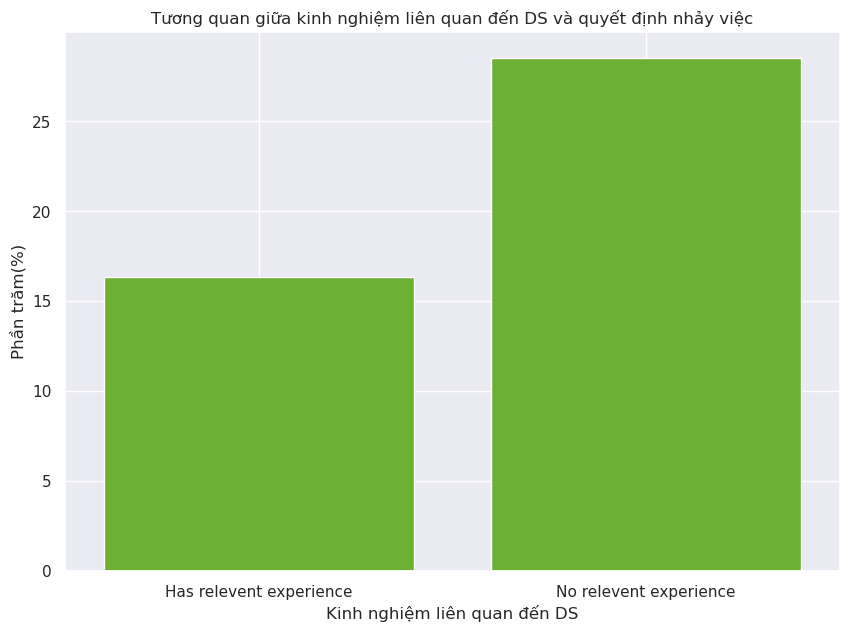

In [23]:
plt.figure(figsize=(10,7))

sns.barplot(x=sr_change_percent.index, y=sr_change_percent.values, color="#6ac61f")

plt.title('Tương quan giữa kinh nghiệm liên quan đến DS và quyết định nhảy việc', fontsize=12)
plt.xlabel('Kinh nghiệm liên quan đến DS', fontsize=12)
plt.ylabel('Phần trăm(%)', fontsize=12)
plt.grid(True)

plt.show()

<h3 style='color:#6ac61f; line-height: 1.5;'>🧐🧐🧐 Từ biểu đồ trên ta có thể thấy phần trăm những người không có kinh nghiệm liên quan đến DS có mong muốn nhảy việc cao hơn những người có kinh nghiệm khoảng 10%.
</h3>

<h3 style='color:red; font-size:25px'> 3. Có sự chênh lệch trình độ học vấn giữa nam và nữ hay không? 
Điều này có ảnh hưởng tới chỉ số phát triển của thành phố nơi mà họ làm việc? </h3>

<h3 style='color:#6ac61f'> Bước 1: Thống kê số lượng các ứng viên theo giới tính </h3>

```num_applicants_by_gender``` thống kê số lượng ứng viên phân nhóm theo từng giới tính

In [24]:
num_applicants_by_gender = df.groupby('gender').size()
num_applicants_by_gender

gender
Female     857
Male      8572
Other       89
dtype: int64

Ta thấy số lượng ứng viên nam có 1 sự chênh lệch rõ rệt so với số lượng ứng viên với các giới tính khác<br>
Để tìm hiểu sâu hơn ta tiến hành thống kê trình độ học vấn của các ứng viên theo giới tính

<h3 style='color:#6ac61f'> Bước 2: Thống kê trình độ học vấn của các ứng viên theo giới tính </h3><br>
```studies_by_gender``` sẽ phân loại trình độ học vấn theo giới tính

In [25]:
studies_by_gender = df.groupby(['gender', 'education_level']).size()
studies_by_gender

gender  education_level
Female  Graduate            571
        Masters             244
        Phd                  42
Male    Graduate           6095
        Masters            2260
        Phd                 217
Other   Graduate             73
        Masters              16
dtype: int64

<h3 style='color:#6ac61f'> Bước 3: Tính tỉ lệ trình độ học vấn </h3>

DataFrame ```education_ratio``` gồm 3 cột ứng với giới tính và 3 dòng ứng với trình độ học vấn lưu tỉ lệ trình độ học vấn theo giới tính (từ 0 đến 100)

In [26]:
education_ratio = studies_by_gender / num_applicants_by_gender * 100
education_ratio = education_ratio.to_frame()
education_ratio = education_ratio.reset_index().pivot(index = 'education_level', columns = 'gender')
education_ratio = education_ratio.where(education_ratio.notna(), 0)
education_ratio = education_ratio[0]
education_ratio

gender,Female,Male,Other
education_level,,,
Graduate,66.627771,71.103593,82.022472
Masters,28.471412,26.364909,17.977528
Phd,4.900817,2.531498,0.000000


<h3 style='color:#6ac61f'> Bước 4: Trực quan hóa dữ liệu </h3>

Ta sẽ trực quan mối tương quan giữa trình độ học vấn theo giới tính bằng đồ thị dạng cột, với:
+ Đồ thị gồm 3 cột ứng với các giới tính
+ Trục hoành có 3 giá trị ứng với trình độ học vấn
+ Trục tung thể hiện tỉ lệ phần trăm

<AxesSubplot:xlabel='education_level'>

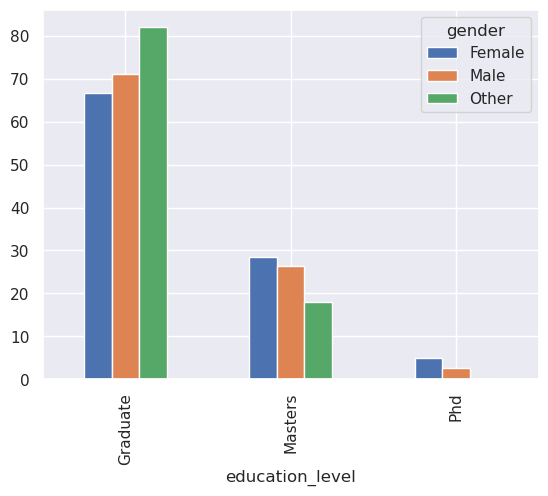

In [27]:
education_ratio.plot.bar()

Nhìn chung ta thấy giới tính khác có tỉ lệ trình độ học vấn là cao nhất mặc dù có 1 sự chênh lệch lớn giữa số lượng so với nam giới<br>
Liệu các ứng viên này có làm việc ở các thành phố có mức sống cao hơn hay không?

<h3 style='color:#6ac61f'> Bước 5: Trả lời cho câu hỏi liệu trình độ học vấn có ảnh hướng tới chỉ số phát triển của thành phố nơi mà các ứng viên làm việc hay không </h3>

`city_development_index_mean` sẽ lưu giá trị trung bình chỉ số phát triển của thành phố theo giới tính

In [30]:
city_development_index_mean = df.groupby(['gender']).mean()['city_development_index']
city_development_index_mean

gender
Female    0.849370
Male      0.839467
Other     0.873337
Name: city_development_index, dtype: float64

Như vậy, giới tính khác là các ứng viên làm việc ở các thành phố có chỉ số phát triển cao nhất

--- ----

## E. Tổng hợp lại quá trình thực hiện đồ án